# Interactive Bath Model Analysis

This notebook provides an interactive analysis of different bosonic bath models used in quantum optics and open quantum systems. It allows comparison between different bath types and their spectral properties.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Bath Model Definitions](#definitions)
3. [Interactive Parameter Controls](#controls)
4. [Bath Comparison Analysis](#comparison)
5. [Temperature Effects](#temperature)
6. [Correlation Function Analysis](#correlation)

### Discussion: Units of Spectral Density in Different Conventions
$J(\omega)$ describes the spectral density of environmental modes at a given frequency $\omega$ and how strongly these modes couple to the system.
In the [paper](https://pubs.aip.org/aip/jcp/article/124/23/234505/930637/Two-dimensional-optical-three-pulse-photon-echo), **spectroscopic units of cm⁻¹** are used for transition frequencies ("wavenumbers"). The spectral density is defined as:
$$
J(\omega) = \alpha^2 \frac{\omega}{\omega_c} \exp\left(-\frac{\omega}{\omega_c}\right)
$$
where:
- $\alpha$ is the dimensionless coupling strength,
- $\omega_c$ is the cutoff frequency,
- $\omega$ is the frequency.

**Units:**  
- $J(\omega)$ is dimensionless in this context.


In **QuTiP**, the Ohmic spectral density is typically written as:
$$
J(\omega) = \alpha \frac{\omega^s}{\omega_c^{s-1}} \exp\left(-\frac{\omega}{\omega_c}\right)
$$
For the Ohmic case ($s = 1$):
$$
J(\omega) = \alpha \omega \exp\left(-\frac{\omega}{\omega_c}\right)
$$
where:
- $\alpha$ is the dimensionless coupling strength,
- $\omega_c$ is the cutoff frequency,
- $\omega$ is the frequency.

**Units:**  
- $J(\omega)$ now has units of frequency ($[\omega]$).


#### Physical Meaning

According to [Wikipedia](https://en.wikipedia.org/wiki/Spectral_density), the spectral density $J(\omega)$ represents the **amount of Power per unit frequency range**. ---

**References:**  
- Weiss, U. (2012). Quantum Dissipative Systems.

$$
H_{\text{SB}} = \Sigma_i F_i Aᵢ
$$

$$
[\mathbf{A}_i] =  \left[\mu\right] = 1  \quad \text{(dimensionless (in the paper))}
$$

$$
[H_{\text{SB}}] = \left[J\right] = \left[eV\right]
$$

Then:
$$
[F_i] = \left[ J\right] = \left[eV\right]
$$

And:
$$
[g_x^i] = \left[ J\right] = \left[eV\right] = \left[ \omega\right] \text{(because [HBAR]=1)}
$$

$$
[J_i(\omega)] = [g_x^{i\,2} \, \delta(\omega)] = \left[\omega\right] \text{(matches the Qutip definition)}
$$
But now:
$$
[J(\omega)] = [\alpha^2] ?=? \left[\omega^2\right]
$$


**Actually the coupling constant in the paper is Not dimensionless**


## Bath Model Definitions

We analyze three main types of bosonic baths:

1. **Paper Bath**: Exponential cutoff spectral density as used in the research paper
2. **Ohmic Bath**: Power-law spectral density with exponential cutoff  
3. **Drude-Lorentz Bath**: Lorentzian spectral density commonly used in condensed matter

Each bath is characterized by its spectral density $J(\omega)$ and Power spectrum $S(\omega)$.

In [1]:

from pathlib import Path
custom_dir = Path("test_baths")
custom_dir.mkdir(exist_ok=True)

from plotstyle.style import init_style, COLORS, LINE_STYLES, MARKERS, save_fig

# Initialize matplotlib/LaTeX style once
init_style()

# BATH MODEL CONSTANTS AND PARAMETERS (UPDATED)

# Default parameter sets for different bath types
cutoff = 100.0  # Bath cutoff frequency
temp = 1e2  # Bath temperature
alpha = 1  # Coupling strength
s = 1.0  # Ohmicity parameter
from qspectro2d.core.bath_system.bath_fcts import (
    spectral_density_func_drude_lorentz,
    power_spectrum_func_drude_lorentz,
    spectral_density_func_ohmic,
    power_spectrum_func_ohmic,
    spectral_density_func_paper,
    power_spectrum_func_paper,
)
from qutip import BosonicEnvironment, OhmicEnvironment, DrudeLorentzEnvironment
import numpy as np
import matplotlib.pyplot as plt

# Display default bath parameters
print("🔧 Default bath parameters loaded:")
print(f"   Temperature: {temp:.1e}")
print(f"   Coupling α: {alpha:.1e}")
print(f"   Cutoff: {cutoff:.1e}")

🔧 Default bath parameters loaded:
   Temperature: 1.0e+02
   Coupling α: 1.0e+00
   Cutoff: 1.0e+02


In [2]:
# compare J(w) paper vs ohmic
print(
    "J(w)", spectral_density_func_ohmic(1, temp=temp, cutoff=cutoff, s=s, alpha=alpha / cutoff)
)  # NOTE this is now exactly the paper implementation
print("J(w)", spectral_density_func_paper(1, temp=temp, cutoff=cutoff, s=s, alpha=alpha))

# compare S(w) paper vs ohmic
print(
    "S(w)", power_spectrum_func_ohmic(1, temp=temp, cutoff=cutoff, s=s, alpha=alpha / cutoff)
)  # NOTE this is now exactly the paper implementation
print("S(w)", power_spectrum_func_paper(1, temp=temp, cutoff=cutoff, alpha=alpha))

J(w) 0.009900498337491681
J(w) 0.009900498337491681
S(w) 1.99001666663891
S(w) 1.99001666663891


In [3]:
# SEPARATE AXIS PLOTS FOR PAPER, OHMIC, AND DRUDE-LORENTZ BATHS
dl_env = BosonicEnvironment.from_spectral_density(
    lambda w: spectral_density_func_drude_lorentz(
        w, cutoff=cutoff, temp=temp, alpha=alpha / cutoff
    ),
    wMax=10 * cutoff,
    T=temp,
)
dl_env_check = DrudeLorentzEnvironment(
    T=temp,
    lam=alpha / cutoff,  # NOTE this is now exactly the paper implementation
    gamma=cutoff,
)
# Power spectrum and spectral density for each bath
paper_env = BosonicEnvironment.from_spectral_density(
    lambda w: spectral_density_func_paper(w, cutoff=cutoff, temp=temp, alpha=alpha),
    wMax=10 * cutoff,
    T=temp,
)
bath_ohmic = OhmicEnvironment(
    T=temp,
    wc=cutoff,
    s=s,
    alpha=alpha / cutoff,  # NOTE this is now exactly the paper implementation
)

# Frequency range for each bath
omega = np.linspace(-1 * cutoff, 20 * cutoff, 500)
# Time axes for correlation functions
times = np.linspace(-2 / cutoff, 2 / cutoff, 500)

J_func_paper = paper_env.spectral_density
J_func_ohmic = bath_ohmic.spectral_density
J_func_dl = dl_env.spectral_density
J_func_dl_check = dl_env_check.spectral_density

P_func_paper = paper_env.power_spectrum
P_func_ohmic = bath_ohmic.power_spectrum
P_func_dl = dl_env.power_spectrum
P_func_dl_check = dl_env_check.power_spectrum

J_vals_paper = J_func_paper(omega)
P_vals_paper = P_func_paper(omega)
J_vals_ohmic = J_func_ohmic(omega)
P_vals_ohmic = P_func_ohmic(omega)

J_vals_dl = J_func_dl(omega)
P_vals_dl = P_func_dl(omega)
J_vals_dl_check = J_func_dl_check(omega)
P_vals_dl_check = P_func_dl_check(omega)

corr_func_paper = paper_env.correlation_function
corr_func_ohmic = bath_ohmic.correlation_function
corr_func_dl = dl_env.correlation_function
corr_func_dl_check = dl_env_check.correlation_function

corr_paper = corr_func_paper(times)
corr_ohmic = corr_func_ohmic(times)
corr_dl = corr_func_dl(times)
corr_dl_check = corr_func_dl_check(times)

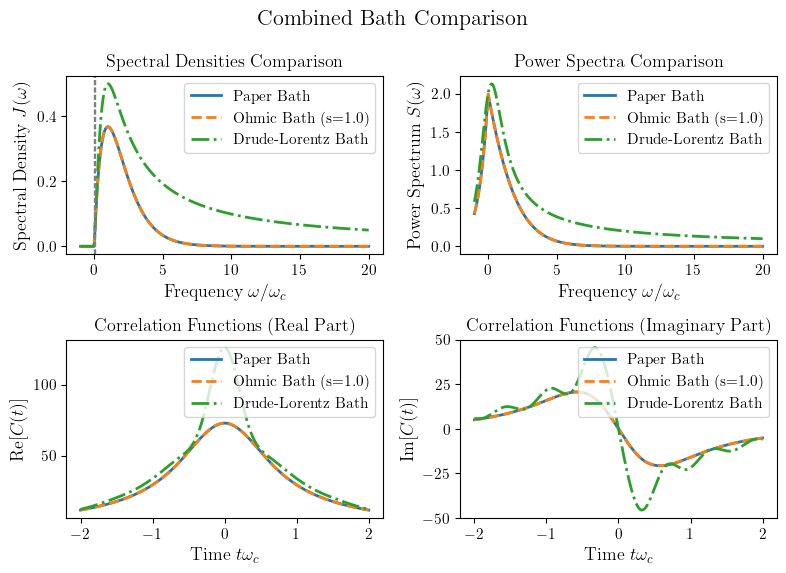

[PosixPath('test_baths/bath_comparison_combined_1.000_100.00_100.000.png'),
 PosixPath('test_baths/bath_comparison_combined_1.000_100.00_100.000.pdf'),
 PosixPath('test_baths/bath_comparison_combined_1.000_100.00_100.000.svg')]

In [4]:
# COMBINED COMPARISON PLOTS (ALL BATHS ON SAME AXES)
fig, axes = plt.subplots(2, 2)
fig.suptitle(f"Combined Bath Comparison\n", fontsize=16, y=0.95)

# SPECTRAL DENSITIES COMPARISON
axes[0, 0].plot(
    omega / cutoff,
    J_vals_paper,
    label="Paper Bath",
    color=COLORS[0],
    linewidth=2,
    linestyle="solid",
)
axes[0, 0].plot(
    omega / cutoff,
    J_vals_ohmic,
    label=f"Ohmic Bath (s={s})",
    color=COLORS[1],
    linewidth=2,
    linestyle="dashed",
)
axes[0, 0].plot(
    omega / cutoff,
    J_vals_dl,
    label="Drude-Lorentz Bath",
    color=COLORS[2],
    linewidth=2,
    linestyle="dashdot",
)
axes[0, 0].axvline(x=1 / cutoff, color='gray', linestyle='--', linewidth=1)
axes[0, 0].axvline(x=2 / cutoff, color='gray', linestyle='--', linewidth=1)

axes[0, 0].set_xlabel(r"Frequency $\omega / \omega_c$")
axes[0, 0].set_ylabel(r"Spectral Density $J(\omega)$")
axes[0, 0].set_title("Spectral Densities Comparison")
axes[0, 0].legend()

# POWER SPECTRA COMPARISON
axes[0, 1].plot(
    omega / cutoff,
    P_vals_paper,
    label="Paper Bath",
    color=COLORS[0],
    linewidth=2,
    linestyle="solid",
)
axes[0, 1].plot(
    omega / cutoff,
    P_vals_ohmic,
    label=f"Ohmic Bath (s={s})",
    color=COLORS[1],
    linewidth=2,
    linestyle="dashed",
)
axes[0, 1].plot(
    omega / cutoff,
    P_vals_dl,
    label="Drude-Lorentz Bath",
    color=COLORS[2],
    linewidth=2,
    linestyle="dashdot",
)
axes[0, 1].set_xlabel(r"Frequency $\omega / \omega_c$")
axes[0, 1].set_ylabel(r"Power Spectrum $S(\omega)$")
axes[0, 1].set_title("Power Spectra Comparison")
axes[0, 1].legend()

# CORRELATION FUNCTIONS COMPARISON (REAL PART)
axes[1, 0].plot(
    times * cutoff,
    np.real(corr_paper),
    label="Paper Bath",
    color=COLORS[0],
    linewidth=2,
    linestyle="solid",
)
axes[1, 0].plot(
    times * cutoff,
    np.real(corr_ohmic),
    label=f"Ohmic Bath (s={s})",
    color=COLORS[1],
    linewidth=2,
    linestyle="dashed",
)
axes[1, 0].plot(
    times * cutoff,
    np.real(corr_dl),
    label="Drude-Lorentz Bath",
    color=COLORS[2],
    linewidth=2,
    linestyle="dashdot",
)
axes[1, 0].set_xlabel(r"Time $t \omega_c$")
axes[1, 0].set_ylabel(r"$\mathrm{Re}[C(t)]$")
axes[1, 0].set_title("Correlation Functions (Real Part)")
axes[1, 0].legend()

# CORRELATION FUNCTIONS COMPARISON (IMAGINARY PART)
axes[1, 1].plot(
    times * cutoff,
    np.imag(corr_paper),
    label="Paper Bath",
    color=COLORS[0],
    linewidth=2,
    linestyle="solid",
)
axes[1, 1].plot(
    times * cutoff,
    np.imag(corr_ohmic),
    label=f"Ohmic Bath (s={s})",
    color=COLORS[1],
    linewidth=2,
    linestyle="dashed",
)
axes[1, 1].plot(
    times * cutoff,
    np.imag(corr_dl),
    label="Drude-Lorentz Bath",
    color=COLORS[2],
    linewidth=2,
    linestyle="dashdot",
)
axes[1, 1].set_xlabel(r"Time $t \omega_c$")
axes[1, 1].set_ylabel(r"$\mathrm{Im}[C(t)]$")
axes[1, 1].set_title("Correlation Functions (Imaginary Part)")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## Save the figure
save_fig(
    fig,
    custom_dir / f"bath_comparison_combined_{alpha:.3f}_{cutoff:.2f}_{temp:.3f}.png",
    formats=["png", "pdf", "svg"],
)

## Temperature Effects Analysis

Explore how temperature affects the bath properties, particularly the Power spectrum and correlation functions:

🌡️ Analyzing temperature effects...


/home/leopold/miniconda3/envs/m_env/lib/python3.11/site-packages/qutip/utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


[PosixPath('test_baths/temperature_analysis_ohmic_bath.svg')]

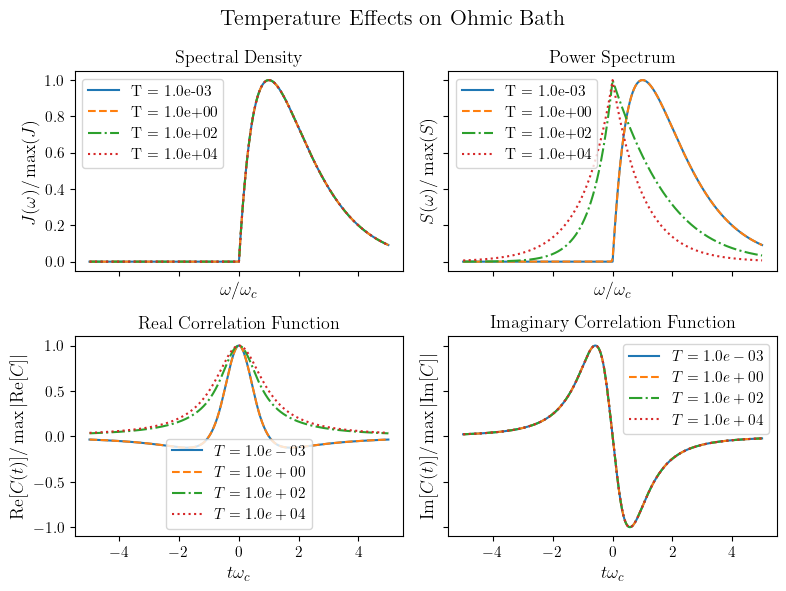

In [5]:

# TEMPERATURE EFFECTS ANALYSIS (UPDATED FOR NEW API)

from plotstyle.style import save_fig


def analyze_temperature_effects(bath_type="Paper Bath", temperatures=None):
    """Analyze how temperature affects bath properties"""
    if temperatures is None:
        temperatures = [1e-3, 1, 1e2, 1e4]

    cutoff = 1e2
    alpha = 1e-2
    frequencies = np.linspace(-5 * cutoff, 5 * cutoff, 10001)
    times = np.linspace(-5 / cutoff, 5 / cutoff, 10001)

    fig, axes = plt.subplots(2, 2, sharex="col", sharey="row")
    fig.suptitle(f"Temperature Effects on {bath_type}", fontsize=16, fontweight="bold")

    for i, temp in enumerate(temperatures):
        color = COLORS[i % len(COLORS)]
        linestyle = LINE_STYLES[i % len(LINE_STYLES)]
        if bath_type == "Paper Bath":
            J_func = spectral_density_func_paper
            S_func = power_spectrum_func_paper
        elif bath_type == "Ohmic Bath":
            J_func = spectral_density_func_ohmic
            S_func = power_spectrum_func_ohmic
        else:
            J_func = spectral_density_func_drude_lorentz
            S_func = power_spectrum_func_drude_lorentz

        local_args = dict(cutoff=cutoff, temp=temp, alpha=alpha, s=1.0)

        # Calculate spectral density and Power spectrum
        J_vals = np.array([J_func(w, **local_args) for w in frequencies])
        S_vals = np.array([S_func(w, **local_args) for w in frequencies])

        # Plot spectral density (normalized)
        J_pos = J_vals[J_vals > 0]
        J_max = np.max(np.abs(J_pos)) if J_pos.size else 1.0
        axes[0, 0].plot(
            frequencies / cutoff,
            J_vals / J_max,
            color=color,
            linestyle=linestyle,
            label=f"T = {temp:.1e}",
        )

        # Plot Power spectrum (normalized)
        S_max = np.max(np.abs(S_vals)) if np.any(S_vals != 0) else 1.0
        axes[0, 1].plot(
            frequencies / cutoff,
            S_vals / S_max,
            color=color,
            linestyle=linestyle,
            label=f"T = {temp:.1e}",
        )

        # Correlation via QuTiP
        try:
            if bath_type == "Paper Bath":
                env = BosonicEnvironment.from_power_spectrum(
                    lambda w: power_spectrum_func_paper(w, **local_args), wMax=10 * cutoff, T=temp
                )
            else:
                env = BosonicEnvironment.from_spectral_density(
                    lambda w: J_func(w, **local_args), wMax=10 * cutoff, T=temp
                )
            correlation_vals = env.correlation_function(times)

            # Plot real part of correlation function
            C_max = np.max(np.abs(np.real(correlation_vals)))
            if C_max > 0:
                axes[1, 0].plot(
                    times * cutoff,
                    np.real(correlation_vals) / C_max,
                    color=color,
                    linestyle=linestyle,
                    label=rf"$T = {temp:.1e}$",
                )

            # Plot imaginary part of correlation function
            C_imax = np.max(np.abs(np.imag(correlation_vals)))
            if C_imax > 0:
                axes[1, 1].plot(
                    times * cutoff,
                    np.imag(correlation_vals) / C_imax,
                    color=color,
                    linestyle=linestyle,
                    label=rf"$T = {temp:.1e}$",
                )
        except Exception as e:
            print(f"QuTiP error for T={temp}: {e}")

    # Set labels and titles
    axes[0, 0].set_xlabel(r"$\omega / \omega_c$")
    axes[0, 0].set_ylabel(r"$J(\omega) / \max(J)$")
    axes[0, 0].set_title("Spectral Density")
    axes[0, 0].legend()

    axes[0, 1].set_xlabel(r"$\omega / \omega_c$")
    axes[0, 1].set_ylabel(r"$S(\omega) / \max(S)$")
    axes[0, 1].set_title("Power Spectrum")
    axes[0, 1].legend()

    axes[1, 0].set_xlabel(r"$t \omega_c$")
    axes[1, 0].set_ylabel(r"$\mathrm{Re}[C(t)] / \max|\mathrm{Re}[C]|$")
    axes[1, 0].set_title("Real Correlation Function")
    axes[1, 0].legend()

    axes[1, 1].set_xlabel(r"$t \omega_c$")
    axes[1, 1].set_ylabel(r"$\mathrm{Im}[C(t)] / \max|\mathrm{Im}[C]|$")
    axes[1, 1].set_title("Imaginary Correlation Function")
    axes[1, 1].legend()

    plt.tight_layout()
    return fig, axes


# Create temperature analysis
print("🌡️ Analyzing temperature effects...")
fig_temp, axes_temp = analyze_temperature_effects("Ohmic Bath")
save_fig(fig_temp, custom_dir / "temperature_analysis_ohmic_bath")

### Physical Interpretation:
- **Weak coupling regime**: $α ≪ 1$ ensures validity of Born-Markov approximation
- **High temperature**: Classical limit where $S(ω) ≈ S(-ω)$
- **Low temperature**: Quantum regime with strong frequency asymmetry

## Compare the BR to the ME solver in QuTiP

In [6]:
### THIS VERSION WORKS ONLY FOR OHMIC BATHS
def ohmic_alpha_to_rate(
    alpha: float, env: OhmicEnvironment, w0: float = None, mode: str = "decay"
) -> tuple[float, float] | float:
    """
    Wrapper to convert bath coupling constant alpha to ME rates.
    Args:
        alpha: Coupling constant of the bath.
        env: OhmicEnvironment instance with the bath parameters.
        w0: System frequency (required for decay mode).
        mode: 'decay' for decay rates, 'deph' for dephasing rate.
    Returns:
        Decay rates (gamma_emission, gamma_absorption) or dephasing rate (gamma_deph).
    """
    if mode == "decay":
        if w0 is None:
            raise ValueError("System frequency w0 must be provided for decay mode.")
        return ohmic_alpha_to_decay_rates(alpha, env, w0)
    elif mode == "deph":
        return ohmic_alpha_to_dephasing_rate(alpha, env)
    else:
        raise ValueError("Invalid mode. Use 'decay' or 'deph'.")


def ohmic_rate_to_alpha(
    rate: float | tuple[float, float],
    env: OhmicEnvironment,
    w0: float = None,
    wc=None,
    mode: str = "decay",
) -> float:
    """
    Wrapper to convert ME rates to bath coupling constant alpha.
    Args:
        rate: Decay rates (gamma_emission, gamma_absorption) or dephasing rate (gamma_deph).
        env: OhmicEnvironment instance with the bath parameters.
        w0: System frequency (required for decay mode).
        mode: 'decay' for decay rates, 'deph' for dephasing rate.
    Returns:
        alpha: Coupling constant of the bath.
    """
    if wc is None:
        wc = w0
    if mode == "decay":
        return ohmic_decay_rate_to_alpha(rate, env, w0, wc)
    elif mode == "deph":
        if not isinstance(rate, float):
            raise ValueError("Rate must be a float (gamma_deph) for dephasing mode.")
        return ohmic_dephasing_rate_to_alpha(rate, env, wc)
    else:
        raise ValueError("Invalid mode. Use 'decay' or 'deph'.")


def ohmic_alpha_to_decay_rates(
    alpha: float, env: OhmicEnvironment, w0: float
) -> tuple[float, float]:
    """
    Convert bath coupling constant alpha to ME decay channel rates.
    Args:
        alpha: Coupling constant of the bath.
        env: OhmicEnvironment instance with the bath parameters.
        w0: System frequency.
    Returns:
        gamma_emission: Spontaneous emission rate.
        gamma_absorption: Thermal absorption rate.
    """
    env.alpha = alpha
    P_plus = env.power_spectrum(w0)  # S(+ω) - emission rate
    P_minus = env.power_spectrum(-w0)  # S(-ω) - absorption rate
    return P_plus, P_minus


def ohmic_decay_rate_to_alpha(
    gamma_emission: float, env: OhmicEnvironment, w0: float, wc: float
) -> float:
    """
    Convert ME decay channel rates to bath coupling constant alpha.
    Args:
        gamma_emission: Spontaneous emission rate.
        gamma_absorption: Thermal absorption rate.
        env: OhmicEnvironment instance with the bath parameters.
        w0: System frequency.
    Returns:
        alpha: Coupling constant of the bath.
    """
    # Avoid division by zero if w0 is very small
    if w0 < 1e-12:
        raise ValueError("w0 is too small; cannot determine alpha reliably.")

    temp = env.T

    P_plus = gamma_emission
    # Invert power spectrum to find alpha
    from qspectro2d.config import BOLTZMANN, HBAR

    w_th = BOLTZMANN * temp / HBAR
    coth_term = 1 / np.tanh(w0 / (2 * w_th))
    alpha = P_plus / (w0 * np.exp(-w0 / wc) * (coth_term + 1))

    return alpha


def ohmic_alpha_to_dephasing_rate(alpha: float, env: OhmicEnvironment) -> float:
    """
    Convert bath coupling constant alpha to ME dephasing rate.
    Args:
        alpha: Coupling constant of the bath.
        env: OhmicEnvironment instance with the bath parameters.
    Returns:
        gamma_deph: Pure dephasing rate.
    """
    print("now at0 freq 0 the PowerSpec is", env.power_spectrum(0))
    env.alpha = alpha
    P_zero = env.power_spectrum(0)  # S(0) - dephasing rate
    print("at freq 0 the PowerSpec is", P_zero)
    gamma_deph = P_zero
    return gamma_deph


def ohmic_dephasing_rate_to_alpha(gamma_deph: float, env: OhmicEnvironment, wc: float) -> float:
    """
    Convert ME dephasing rate to bath coupling constant alpha.
    Args:
        gamma_deph: Pure dephasing rate.
        env: OhmicEnvironment instance with the bath parameters.
    Returns:
        alpha: Coupling constant of the bath.
    """
    from qspectro2d.config import BOLTZMANN

    temp = env.T
    P_zero = gamma_deph
    alpha = P_zero / (2 * BOLTZMANN * temp)

    return alpha

### tls comparison between Redfield and Linblad rates

operator in canonical basis vs eigenbasis: Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.    0.001]
 [0.001 0.   ]] [[ 0.    -0.001]
 [-0.001  0.   ]]
hamilton in canonical basis vs eigenbasis: Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0.]
 [0. 2.]] [[0. 0.]
 [0. 2.]]
At ω=0, P(ω)=4.01e-05


[PosixPath('test_baths/ohmic_power_spectrum.svg')]

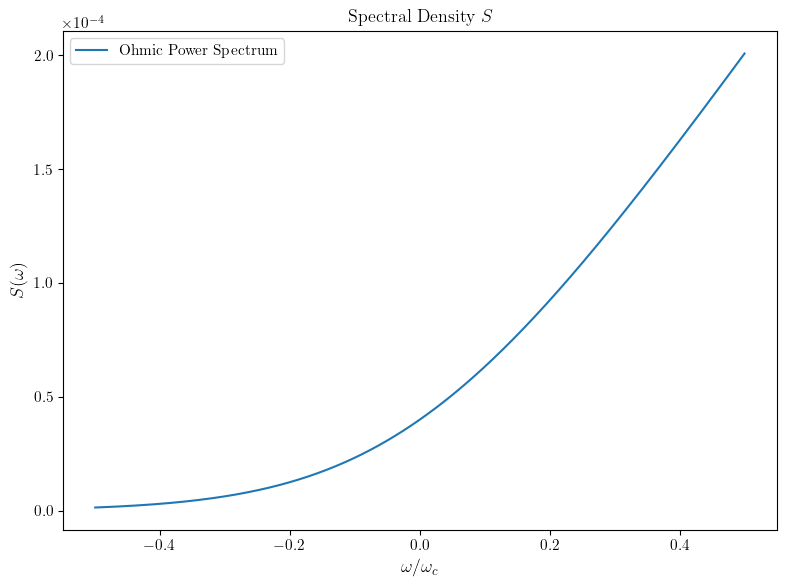

In [7]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt


# SYSTEM PARAMETERS

g = basis(2, 0)
e = basis(2, 1)  # Ground and excited states

sigma_minus = g * e.dag()  # |g⟩⟨e| - lowering operator
sigma_plus = e * g.dag()  # |e⟩⟨g| - raising operator

sigma_x = sigma_minus + sigma_plus  # σ_x operator for system-bath coupling
sigma_z = e * e.dag() - g * g.dag()  # σ_z operator for system-bath coupling

w0 = 2.0  # central transition frequency
wL = 0.99 * w0  # laser frequency
rabi = 1e-3  # drive amplitude (same on both sites)
H0 = w0 * ket2dm(e)  # Hamiltonian: H = w0 |e⟩⟨e| + rabi (|g⟩⟨e| + |e⟩⟨g|)
# Classical drive couples to dipoles (x) on both sites
basis_states = H0.eigenstates()[1]
# print("eigenvectors", basis_states)
U = Qobj(np.column_stack([e.full() for e in basis_states]), dims=H0.dims)
mu_drive = rabi * (sigma_x)
mu_new = U.dag() * mu_drive * U
H_diag = U.dag() * H0 * U
print("operator in canonical basis vs eigenbasis:", mu_drive, mu_new.tidyup().full().real)
print("hamilton in canonical basis vs eigenbasis:", H0, H_diag.tidyup().full().real)
H = [H_diag, [mu_new, lambda t: np.cos(wL * t)]]

# BATH PARAMETERS

temp = 1e-1  # Temperature in Kelvin
cutoff = 1e2 * w0  # Cutoff frequency in cm^-1
alpha = 1e-4 * w0  # Coupling strength
ohm_env = OhmicEnvironment(T=temp, wc=cutoff, s=1.0, alpha=alpha, tag="ohmic")

omega = np.linspace(-5e-1, 5e-1, 1000)  # Frequency
power_spectrum_vals = ohm_env.power_spectrum(omega)
print("At ω=0, P(ω)=%.2e" % power_spectrum_vals[500])  # Print power spectrum at ω=0

plt.figure()
plt.plot(omega, power_spectrum_vals, label="Ohmic Power Spectrum", color=COLORS[0])
plt.xlabel(r"$\omega / \omega_c$")  # Use LaTeX math formatting for Greek letters
plt.ylabel(r"$S(\omega)$")  # Example: update ylabel as well
plt.title(r"Spectral Density $S$")  # Update title
plt.legend()
save_fig(plt.gcf(), custom_dir / "ohmic_power_spectrum")

In [8]:
# SIMPLIFIED PLOTTING AND ANALYSIS
# Recalculate with consistent omega array
omega = np.linspace(-1 * cutoff, 20 * cutoff, 1000)
J_vals_paper = J_func_paper(omega)
J_vals_ohmic = J_func_ohmic(omega)
P_vals_paper = P_func_paper(omega)
P_vals_ohmic = P_func_ohmic(omega)
J_vals_dl = J_func_dl(omega)
P_vals_dl = P_func_dl(omega)

def create_comparison_plot():
    """Create comprehensive bath comparison plots"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Spectral densities
    axes[0, 0].plot(omega / cutoff, J_vals_paper, label="Paper", color=COLORS[0])
    axes[0, 0].plot(omega / cutoff, J_vals_ohmic, label="Ohmic", color=COLORS[1], linestyle="--")
    axes[0, 0].set_xlabel(r"$\omega / \omega_c$")
    axes[0, 0].set_ylabel(r"$J(\omega)$")
    axes[0, 0].set_title("Spectral Density Comparison")
    axes[0, 0].legend()

    # Log scale
    axes[0, 1].plot(omega / cutoff, J_vals_paper, label="Paper", color=COLORS[0])
    axes[0, 1].plot(omega / cutoff, J_vals_ohmic, label="Ohmic", color=COLORS[1], linestyle="--")
    axes[0, 1].set_xlabel(r"$\omega / \omega_c$")
    axes[0, 1].set_ylabel(r"$J(\omega)$")
    axes[0, 1].set_title("Spectral Density (Log Scale)")
    axes[0, 1].set_yscale("log")
    axes[0, 1].legend()

    # Ratio
    ratio = np.divide(
        J_vals_ohmic, J_vals_paper, out=np.zeros_like(J_vals_ohmic), where=J_vals_paper != 0
    )
    axes[1, 0].plot(omega / cutoff, ratio, color=COLORS[2])
    axes[1, 0].set_xlabel(r"$\omega / \omega_c$")
    axes[1, 0].set_ylabel(r"$J_{ohmic}(\omega) / J_{paper}(\omega)$")
    axes[1, 0].set_title("Ratio of Ohmic to Paper")

    axes[1, 1].axis("off")  # Empty subplot

    plt.tight_layout()
    plt.show()

    return fig

add a part explaining the double hilbertspace and so on

now at0 freq 0 the PowerSpec is 4e-05
at freq 0 the PowerSpec is 4e-05


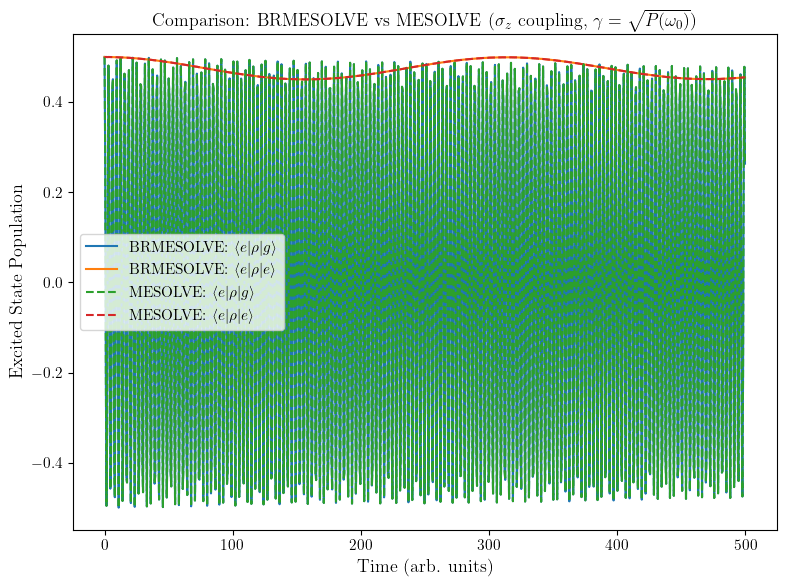

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [9]:
rho_ini = (e + g).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 500, 1000)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme_deph = [
    [sigma_z, lambda w: ohm_env.power_spectrum(w)]
]  # Use sigma_z as system-bath coupling

result_brme_deph = brmesolve(H, rho_ini, tlist, a_ops_brme_deph)


# MESOLVE SIMULATION

### Extract power spectrum at zero frequency for pure dephasing
gamma_deph = ohmic_alpha_to_rate(alpha, ohm_env, mode="deph")  # Pure dephasing rate

### Collapse operators for pure dephasing
c_ops_me_deph = [np.sqrt(gamma_deph) * sigma_z]  # Pure dephasing collapse operator

result_me_deph = mesolve(H, rho_ini, tlist, c_ops_me_deph)


# PLOT COMPARISON

plt.figure()

# Plot coherence and pop for brmesolve
pop_brme = [state[1, 1].real for state in result_brme_deph.states]
coh_brme = [state[0, 1].real for state in result_brme_deph.states]
plt.plot(
    tlist,
    coh_brme,
    label=r"BRMESOLVE: $\langle e|\rho|g\rangle$",
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
)
plt.plot(
    tlist,
    pop_brme,
    label=r"BRMESOLVE: $\langle e|\rho|e\rangle$",
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
)
# Plot coherence and pop for mesolve
pop_me = [state[1, 1].real for state in result_me_deph.states]
coh_me = [state[0, 1].real for state in result_me_deph.states]
plt.plot(
    tlist,
    coh_me,
    label=r"MESOLVE: $\langle e|\rho|g\rangle$",
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
)
plt.plot(
    tlist,
    pop_me,
    label=r"MESOLVE: $\langle e|\rho|e\rangle$",
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
)

plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Excited State Population")
plt.title(r"Comparison: BRMESOLVE vs MESOLVE ($\sigma_z$ coupling, $\gamma = \sqrt{P(\omega_0)}$)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()

In [10]:
rho_ini = (e + g).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 50, 500)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme = a_ops_brme_decay + a_ops_brme_deph
result_brme = brmesolve(H, rho_ini, tlist, a_ops_brme)


# MESOLVE SIMULATION

c_ops_me = c_ops_me_decay + c_ops_me_deph

result_me = mesolve(H, rho_ini, tlist, c_ops_me)


# PLOT COMPARISON

plt.figure()

# Plot coherence and pop for brmesolve
pop_brme = [state[1, 1].real for state in result_brme.states]
coh_brme = [state[0, 1].real for state in result_brme.states]
plt.plot(
    tlist,
    coh_brme,
    label=r"BRMESOLVE: $\langle e|\rho|g\rangle$",
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
)
plt.plot(
    tlist,
    pop_brme,
    label=r"BRMESOLVE: $\langle e|\rho|e\rangle$",
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
)
# Plot coherence and pop for mesolve
pop_me = [state[1, 1].real for state in result_me.states]
coh_me = [state[0, 1].real for state in result_me.states]
plt.plot(
    tlist,
    coh_me,
    label=r"MESOLVE: $\langle e|\rho|g\rangle$",
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
)
plt.plot(
    tlist,
    pop_me,
    label=r"MESOLVE: $\langle e|\rho|e\rangle$",
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
)

plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Excited State Population")
plt.title(r"Comparison: BRMESOLVE vs MESOLVE ($\sigma_x$ coupling, $\gamma = \sqrt{P(\omega_0)}$)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()

NameError: name 'a_ops_brme_decay' is not defined

## Dimer (4-level) comparison: BRMESOLVE vs MESOLVE

We consider a dimer composed of two coupled two-level systems (sites), with:
- Local site energies $\omega_1$ and $\omega_2$
- Excitonic coupling $J$ between single-exciton states
- Classical driving by a coherent laser: $\propto \cos(\omega_L t)$ acting on both sites
- Local Ohmic baths on each site providing energy relaxation (via $\sigma_x$) and pure dephasing (via $\sigma_z$)

We compare Redfield (BRMESOLVE) and Lindblad (MESOLVE) dynamics using rates inferred from the bath power spectra.

In [ ]:

# DIMER SETUP AND COMPARISON (4-LEVEL SYSTEM)

import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, qeye, tensor, ket2dm, Qobj, OhmicEnvironment, brmesolve, mesolve


# SYSTEM: TWO SITES (2 x TLS) → 4 LEVELS

g = basis(2, 0)  # |g>
e = basis(2, 1)  # |e>
I2 = qeye(2)

# Local ops for one site
sm = g * e.dag()  # lowering
sp = e * g.dag()  # raising
sx = sm + sp
sz = e * e.dag() - g * g.dag()  # Pauli-z

# Tensor-site operators
sm1 = tensor(sm, I2)
sp1 = tensor(sp, I2)
sx1 = tensor(sx, I2)
sz1 = tensor(sz, I2)

sm2 = tensor(I2, sm)
sp2 = tensor(I2, sp)
sx2 = tensor(I2, sx)
sz2 = tensor(I2, sz)

# Projectors for observables
P_gg = tensor(g * g.dag(), g * g.dag())
P_eg = tensor(e * e.dag(), g * g.dag())
P_ge = tensor(g * g.dag(), e * e.dag())
P_ee = tensor(e * e.dag(), e * e.dag())


# HAMILTONIAN PARAMETERS

delta = 0.2 * w0  # site detuning
w1 = w0 + 0.5 * delta  # site-1 transition
w2 = w0 - 0.5 * delta  # site-2 transition
J_coup = 5e-3 * w0  # excitonic coupling

# Bare H0 in site basis: local excitations + resonant exchange (single-exciton manifold)
H0 = w1 * P_eg + w2 * P_ge + J_coup * (sp1 * sm2 + sp2 * sm1) + (w1 + w2) * P_ee

# Classical drive couples to dipoles (x) on both sites
basis_states = H0.eigenstates()[1]
# print("eigenvectors", basis_states)
U = Qobj(np.column_stack([e.full() for e in basis_states]), dims=H0.dims)
mu_drive = rabi * (sx1 + sx2)
mu_new = U.dag() * mu_drive * U
H_diag = U.dag() * H0 * U
print("operator in canonical basis vs eigenbasis:", mu_drive, mu_new.tidyup().full().real)
print("hamilton in canonical basis vs eigenbasis:", H0, H_diag.tidyup().full().real)
H = [H_diag, [mu_new, lambda t: np.cos(wL * t)]]



# OBSERVABLES AND PLOTS

def pops_from_result(result):
    """Return populations and coherences for a two-site system."""
    states = result.states

    # populations
    p_gg = np.array([expect(P_gg, st) for st in states])  # both ground
    p_eg = np.array([expect(P_eg, st) for st in states])  # site 1 excited
    p_ge = np.array([expect(P_ge, st) for st in states])  # site 2 excited
    p_ee = np.array([expect(P_ee, st) for st in states])  # both excited

    # inter-site coherence |eg><ge| + |ge><eg|
    coh_op = (tensor(e * g.dag(), g * e.dag()) + tensor(g * e.dag(), e * g.dag())) / 2.0
    coh_IJ = np.array([expect(coh_op, st) for st in states])

    # coherence between ground state and single-excited states:
    # |gg><eg| + |gg><ge|  (and h.c.)
    coh_0I_op = (
        tensor(g * g.dag(), g * e.dag())
        + tensor(g * e.dag(), g * g.dag())
        + tensor(g * e.dag(), g * g.dag())
        + tensor(g * g.dag(), e * g.dag())
    ) / 2.0
    coh_0I = np.array([expect(coh_0I_op, st) for st in states])

    # coherence between ground and double excited: |gg><ee| + h.c.
    coh_0AB_op = tensor(g * g.dag(), g * g.dag()) * tensor(
        e * e.dag(), e * e.dag()
    )  # then add h.c.
    coh_0AB_op = (
        tensor(g, g) * tensor(e.dag(), e.dag()) + tensor(e, e) * tensor(g.dag(), g.dag())
    ) / 2.0
    coh_0AB = np.array([expect(coh_0AB_op, st) for st in states])

    # coherence between single and double excited manifolds:
    # |eg><ee| + |ge><ee| (and h.c.)
    coh_IAB_op = (
        tensor(e * e.dag(), g * e.dag())
        + tensor(g * e.dag(), e * e.dag())
        + tensor(e * g.dag(), e * e.dag())
        + tensor(e * e.dag(), e * g.dag())
    ) / 2.0
    coh_IAB = np.array([expect(coh_IAB_op, st) for st in states])

    return p_gg, p_eg, p_ge, p_ee, coh_IJ, coh_0I, coh_0AB, coh_IAB

operator in canonical basis vs eigenbasis: Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.    0.001 0.001 0.   ]
 [0.001 0.    0.    0.001]
 [0.001 0.    0.    0.001]
 [0.    0.001 0.001 0.   ]] [[0.         0.00097471 0.00102466 0.        ]
 [0.00097471 0.         0.         0.00097471]
 [0.00102466 0.         0.         0.00102466]
 [0.         0.00097471 0.00102466 0.        ]]
hamilton in canonical basis vs eigenbasis: Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.   0.   0.   0.  ]
 [0.   1.8  0.01 0.  ]
 [0.   0.01 2.2  0.  ]
 [0.   0.   0.   4.  ]] [[0.         0.         0.         0.        ]
 [0.         1.79975016 0.         0.        ]
 [0.         0.         2.20024984 0.        ]
 [0.         0.         0.         4.        ]]


c:\Users\leopo\anaconda3\envs\master_env\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\leopo\anaconda3\envs\master_env\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


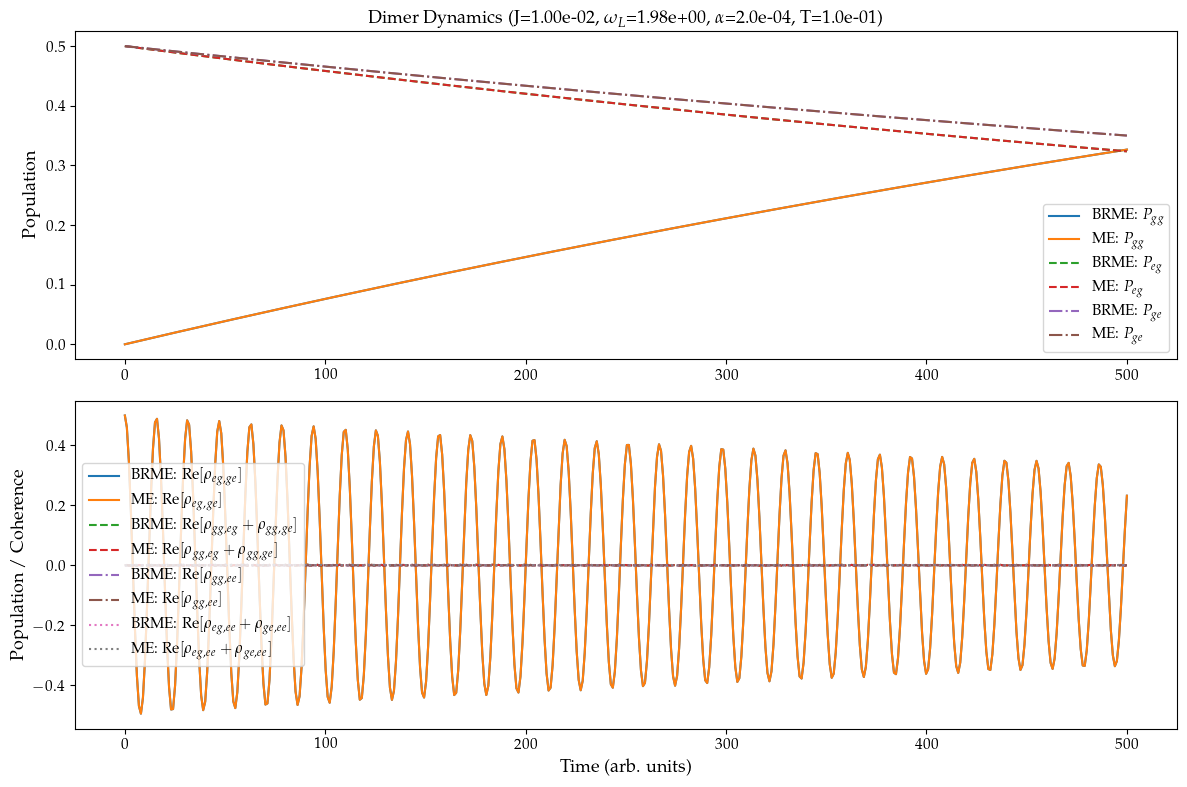

In [ ]:
rho_ini = (tensor(e, g) + tensor(g, e)).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 500, 500)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme_decay = [
    [sx1, lambda w: ohm_env.power_spectrum(w)],
    [sx2, lambda w: ohm_env.power_spectrum(w)],
]

result_brme_decay = brmesolve(H, rho_ini, tlist, a_ops_brme_decay)


# MESOLVE SIMULATION

### Extract power spectrum at system frequency
gamma_em_1, gamma_abs_1 = ohmic_alpha_to_rate(alpha, ohm_env, w0=w1, mode="decay")
gamma_em_2, gamma_abs_2 = ohmic_alpha_to_rate(alpha, ohm_env, w0=w2, mode="decay")

### Collapse operators
c_ops_me_decay = [
    np.sqrt(gamma_em_1) * sm1,  # Emission: |e⟩ → |g⟩
    np.sqrt(gamma_abs_1) * sp1,  # Absorption: |g⟩ → |e⟩
    np.sqrt(gamma_em_2) * sm2,  # Emission: |e⟩ → |g⟩
    np.sqrt(gamma_abs_2) * sp2,  # Absorption: |g⟩ → |e⟩
]
result_me_decay = mesolve(H, rho_ini, tlist, c_ops_me_decay)

p_gg_b, p_eg_b, p_ge_b, p_ee_b, coh_IJ_b, coh_0I_b, coh_0AB_b, coh_IAB_b = pops_from_result(
    result_brme_decay
)
p_gg_m, p_eg_m, p_ge_m, p_ee_m, coh_IJ_m, coh_0I_m, coh_0AB_m, coh_IAB_m = pops_from_result(
    result_me_decay
)

plt.figure(figsize=(12, 8))

# Populations: |eg>, |ge|
plt.subplot(2, 1, 1)
plt.plot(tlist, p_gg_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{gg}$")
plt.plot(tlist, p_gg_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"ME: $P_{gg}$")
plt.plot(tlist, p_eg_b, color=COLORS[2], linestyle=LINE_STYLES[1], label=r"BRME: $P_{eg}$")
plt.plot(tlist, p_eg_m, color=COLORS[3], linestyle=LINE_STYLES[1], label=r"ME: $P_{eg}$")
plt.plot(tlist, p_ge_b, color=COLORS[4], linestyle=LINE_STYLES[2], label=r"BRME: $P_{ge}$")
plt.plot(tlist, p_ge_m, color=COLORS[5], linestyle=LINE_STYLES[2], label=r"ME: $P_{ge}$")
plt.ylabel(r"Population")
plt.title(
    rf"Dimer Dynamics (J={J_coup:.2e}, $\omega_L$={wL:.2e}, $\alpha$={alpha:.1e}, T={temp:.1e})"
)
plt.legend()

# Double excitation and coherence
plt.subplot(2, 1, 2)
plt.plot(
    tlist,
    coh_IJ_b,
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_IJ_m,
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
    label=r"ME: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_b,
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_m,
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
    label=r"ME: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0AB_b,
    color=COLORS[4],
    linestyle=LINE_STYLES[2],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_0AB_m,
    color=COLORS[5],
    linestyle=LINE_STYLES[2],
    label=r"ME: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_b,
    color=COLORS[6],
    linestyle=LINE_STYLES[3],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_m,
    color=COLORS[7],
    linestyle=LINE_STYLES[3],
    label=r"ME: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Population / Coherence")
plt.legend()

plt.tight_layout()
# save_fig(plt.gcf(), custom_dir / 'dimer_brme_vs_me')
plt.show()

now at0 freq 0 the PowerSpec is 4e-05
at freq 0 the PowerSpec is 4e-05
now at0 freq 0 the PowerSpec is 4e-05
at freq 0 the PowerSpec is 4e-05


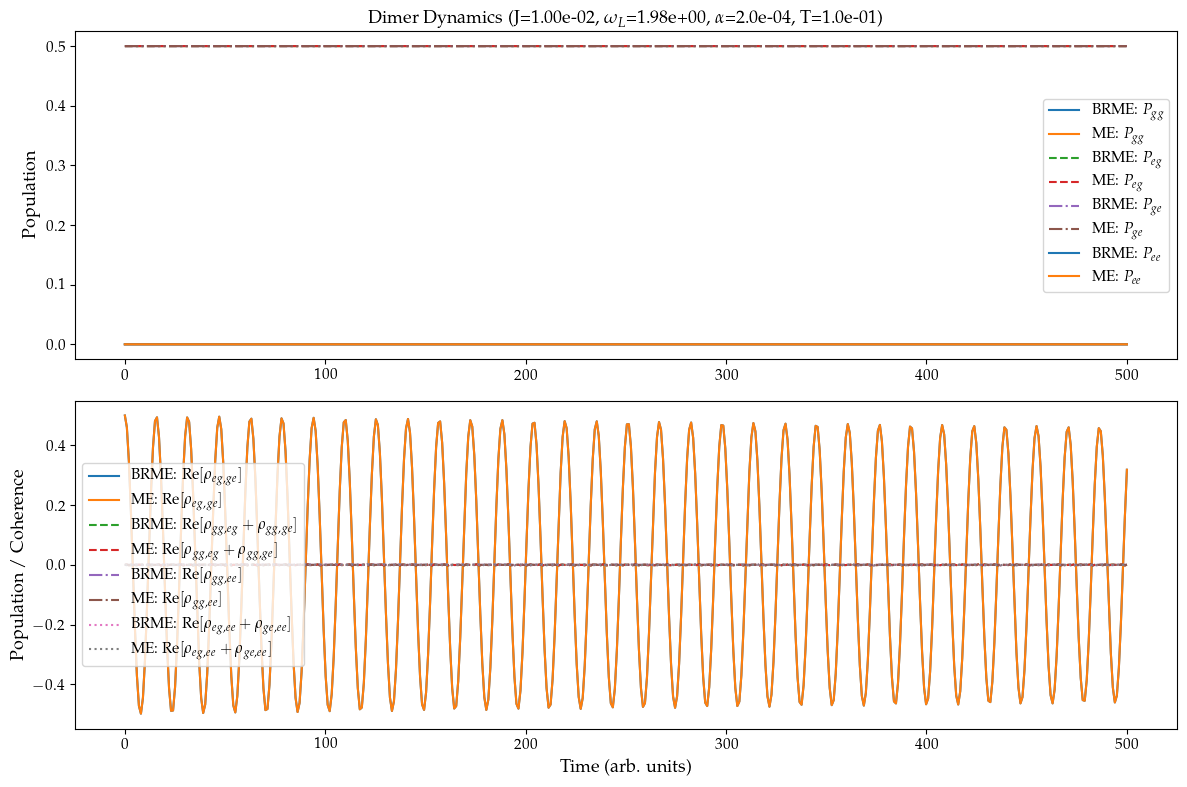

In [ ]:
rho_ini = (tensor(e, g) + tensor(g, e)).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 500, 500)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme_deph = [
    [sz1, lambda w: ohm_env.power_spectrum(w)],
    [sz2, lambda w: ohm_env.power_spectrum(w)],
]

result_brme_deph = brmesolve(H, rho_ini, tlist, a_ops_brme_deph)


# MESOLVE SIMULATION

### Extract power spectrum at system frequency
gamma_deph_1 = ohmic_alpha_to_rate(alpha, ohm_env, w0=w1, mode="deph")
gamma_deph_2 = ohmic_alpha_to_rate(alpha, ohm_env, w0=w2, mode="deph")

### Collapse operators
c_ops_me_deph = [
    np.sqrt(gamma_deph_1) * sz1,  # dephasing:
    np.sqrt(gamma_deph_2) * sz2,  # dephasing:
]
result_me_deph = mesolve(H, rho_ini, tlist, c_ops_me_deph)


p_gg_b, p_eg_b, p_ge_b, p_ee_b, coh_IJ_b, coh_0I_b, coh_0AB_b, coh_IAB_b = pops_from_result(
    result_brme_deph
)
p_gg_m, p_eg_m, p_ge_m, p_ee_m, coh_IJ_m, coh_0I_m, coh_0AB_m, coh_IAB_m = pops_from_result(
    result_me_deph
)

plt.figure(figsize=(12, 8))

# Populations: |eg>, |ge|
plt.subplot(2, 1, 1)
plt.plot(tlist, p_gg_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{gg}$")
plt.plot(tlist, p_gg_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"ME: $P_{gg}$")
plt.plot(tlist, p_eg_b, color=COLORS[2], linestyle=LINE_STYLES[1], label=r"BRME: $P_{eg}$")
plt.plot(tlist, p_eg_m, color=COLORS[3], linestyle=LINE_STYLES[1], label=r"ME: $P_{eg}$")
plt.plot(tlist, p_ge_b, color=COLORS[4], linestyle=LINE_STYLES[2], label=r"BRME: $P_{ge}$")
plt.plot(tlist, p_ge_m, color=COLORS[5], linestyle=LINE_STYLES[2], label=r"ME: $P_{ge}$")
plt.plot(tlist, p_ee_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{ee}$")
plt.plot(tlist, p_ee_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"ME: $P_{ee}$")
plt.ylabel(r"Population")
plt.title(
    rf"Dimer Dynamics (J={J_coup:.2e}, $\omega_L$={wL:.2e}, $\alpha$={alpha:.1e}, T={temp:.1e})"
)
plt.legend()

# Double excitation and coherence
plt.subplot(2, 1, 2)
plt.plot(
    tlist,
    coh_IJ_b,
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_IJ_m,
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
    label=r"ME: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_b,
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_m,
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
    label=r"ME: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0AB_b,
    color=COLORS[4],
    linestyle=LINE_STYLES[2],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_0AB_m,
    color=COLORS[5],
    linestyle=LINE_STYLES[2],
    label=r"ME: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_b,
    color=COLORS[6],
    linestyle=LINE_STYLES[3],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_m,
    color=COLORS[7],
    linestyle=LINE_STYLES[3],
    label=r"ME: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Population / Coherence")
plt.legend()

plt.tight_layout()
# save_fig(plt.gcf(), custom_dir / 'dimer_brme_vs_me')
plt.show()

In [ ]:
rho_ini = (tensor(e, g) + tensor(g, e)).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 500, 500)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme = a_ops_brme_decay + a_ops_brme_deph

result_brme = brmesolve(H, rho_ini, tlist, a_ops_brme, sec_cutoff=0.01)


# MESOLVE SIMULATION

### Collapse operators
c_ops_me = c_ops_me_decay + c_ops_me_deph
result_me = mesolve(H, rho_ini, tlist, c_ops_me)


p_gg_b, p_eg_b, p_ge_b, p_ee_b, coh_IJ_b, coh_0I_b, coh_0AB_b, coh_IAB_b = pops_from_result(
    result_brme
)
p_gg_m, p_eg_m, p_ge_m, p_ee_m, coh_IJ_m, coh_0I_m, coh_0AB_m, coh_IAB_m = pops_from_result(
    result_me
)

plt.figure(figsize=(12, 8))

# Populations: |eg>, |ge|
plt.subplot(2, 1, 1)
plt.plot(tlist, p_gg_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{gg}$")
plt.plot(tlist, p_gg_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"ME: $P_{gg}$")
plt.plot(tlist, p_eg_b, color=COLORS[2], linestyle=LINE_STYLES[1], label=r"BRME: $P_{eg}$")
plt.plot(tlist, p_eg_m, color=COLORS[3], linestyle=LINE_STYLES[1], label=r"ME: $P_{eg}$")
plt.plot(tlist, p_ge_b, color=COLORS[4], linestyle=LINE_STYLES[2], label=r"BRME: $P_{ge}$")
plt.plot(tlist, p_ge_m, color=COLORS[5], linestyle=LINE_STYLES[2], label=r"ME: $P_{ge}$")
plt.plot(tlist, p_ee_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{ee}$")
plt.plot(tlist, p_ee_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"ME: $P_{ee}$")
plt.ylabel(r"Population")
plt.title(
    rf"Dimer Dynamics (J={J_coup:.2e}, $\omega_L$={wL:.2e}, $\alpha$={alpha:.1e}, T={temp:.1e})"
)
plt.legend()

# Double excitation and coherence
plt.subplot(2, 1, 2)
plt.plot(
    tlist,
    coh_IJ_b,
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_IJ_m,
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
    label=r"ME: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_b,
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_m,
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
    label=r"ME: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0AB_b,
    color=COLORS[4],
    linestyle=LINE_STYLES[2],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_0AB_m,
    color=COLORS[5],
    linestyle=LINE_STYLES[2],
    label=r"ME: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_b,
    color=COLORS[6],
    linestyle=LINE_STYLES[3],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_m,
    color=COLORS[7],
    linestyle=LINE_STYLES[3],
    label=r"ME: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Population / Coherence")
plt.legend()

plt.tight_layout()
# save_fig(plt.gcf(), custom_dir / 'dimer_brme_vs_me')
plt.show()

## Compare zero frequency limit of the paper bath and the Ohmic bath

In [ ]:
from qutip import BosonicEnvironment
import numpy as np
from qspectro2d.core.bath_system import (
    spectral_density_func_paper,
    power_spectrum_func_paper,
    power_spectrum_func_ohmic,
)

paper_bath = BosonicEnvironment.from_power_spectrum(
    lambda w: power_spectrum_func_paper(w, **args),
    wMax=10 * cutoff,  # Maximum frequency for the environment
    T=temp,  # Temperature in Kelvin
)

ps_func = lambda w: power_spectrum_func_paper(w, **args)  # Direct function
ps_env = paper_bath.power_spectrum  # QuTiP environment

ps_env_0 = ps_env(0)  # Get power spectrum at zero frequency
ps_f_0 = ps_func(0)  # Calculate power spectrum at zero frequency

print("compare power spectrum at zero frequency:")
print(f"Paper Bath Power Spectrum at ω=0: {ps_env_0:.2e} (from environment)")
print(f"Paper Bath Power Spectrum at ω=0: {ps_f_0:.2e} (from function)")

import matplotlib.pyplot as plt

omega = np.linspace(-1 * cutoff, 1 * cutoff, 5001)
print(omega[len(omega) // 2])  # Print the center frequency (should be close to zero)
ps_func_vals = ps_func(omega)  # Direct function
ps_env_vals = ps_env(omega)  # QuTiP environment

plt.figure(figsize=(8, 6))
plt.plot(
    omega / cutoff,
    ps_func_vals,
    label=r"$S_{\mathrm{paper}}(\omega)$ (function)",
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
)
plt.plot(
    omega / cutoff,
    ps_env_vals,
    label=r"$S_{\mathrm{paper}}(\omega)$ (environment)",
    color=COLORS[1],
    linestyle=LINE_STYLES[1],
)
plt.plot(
    1, ps_env(cutoff), "o", label=r"$S_{\mathrm{paper}}(cutoff)$", markersize=8, color=COLORS[2]
)
plt.xlabel(r"$\omega / \omega_c$")  # Use LaTeX math formatting for Greek letters
plt.ylabel(r"$S(\omega)$")  # Example: update ylabel as well
plt.title(r"Compare Paper Power spectrum (function vs env)")  # Update title
plt.legend()

flat spectral density J(w)=gamma/2 and T=0-> definition of qutip -> S(w) = gamma theta(w)  [at w0 a transition rate of gamma]

the definition of the Ohmic bath in QuTiP is different fomr the paper:
factor 2

the coupling is always weak / strong with respect to the system frequency w0 -> weak 

In [ ]:
tes_bath = OhmicEnvironment(T=temp, wc=cutoff, s=1.0, alpha=alpha, tag="ohmic")
w0 = 2  # System frequency in cm^-1
print("The power spectrum at w0 has value ", tes_bath.power_spectrum(w0))
me_rates = ohmic_alpha_to_rate(alpha, env=tes_bath, w0=w0, mode="decay")
print(f"ME decay rates for ohmic Bath (α={alpha}):")
print(f"  Emission Rate: {me_rates[0]}")
print(f"  Absorption Rate: {me_rates[1]}")

alpha_reconstructed = ohmic_rate_to_alpha(me_rates[0], env=tes_bath, w0=w0, wc=cutoff, mode="decay")
print(f"Reconstructed α from ME rates: {alpha_reconstructed} (should match original α={alpha})")

In [ ]:
print("The power spectrum at w=0 has value ", tes_bath.power_spectrum(0))
me_rate = ohmic_alpha_to_rate(alpha, env=tes_bath, w0=w0, mode="deph")
print(f"ME dephasing rate for ohmic Bath (α={alpha}):")
print(f"  Dephasing Rate: {me_rate}")

alpha_reconstructed = ohmic_rate_to_alpha(me_rate, env=tes_bath, w0=w0, wc=cutoff, mode="deph")
print(f"Reconstructed α from ME rate: {alpha_reconstructed} (should match original α={alpha})")

In [ ]:
reconstucted_bath = OhmicEnvironment(
    T=temp, wc=cutoff, s=1.0, alpha=alpha_reconstructed, tag="ohmic_reconstructed"
)
omega = np.linspace(-2 * cutoff, 1 * cutoff, 5001)
def_vals = tes_bath.power_spectrum(omega)  # Direct function
reconst_vals = reconstucted_bath.power_spectrum(omega)  # QuTiP environment

plt.figure(figsize=(8, 6))

plt.plot(
    omega,
    def_vals,
    label=r"$S_{\mathrm{ohm}}(\omega)$ (original)",
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
)
plt.plot(
    omega,
    reconst_vals,
    label=r"$S_{\mathrm{ohm}}(\omega)$ (reconstructed)",
    color=COLORS[1],
    linestyle=LINE_STYLES[1],
)
plt.xlabel(r"$\omega / \omega_c$")
plt.ylabel(r"Power Spectrum $S(\omega)$")
plt.legend()

plt.show()

In [ ]:

# SECULAR APPROXIMATION TESTS

import time
from qutip import brmesolve, mesolve

### Test different secular approximation settings
print("=" * 60)
print("SECULAR APPROXIMATION COMPARISON TEST")
print("=" * 60)

# Test parameters - use existing system setup
test_tlist = np.linspace(0, 5, 50)  # Shorter time for faster testing

# Different secular approximation settings to test
sec_cutoffs = [
    -1,  # No secular approximation
    0.01,  # Very strict approximation
    0.05,  # Strict approximation
    0.1,  # Default approximation
    0.2,  # Relaxed approximation
    0.5,  # Very relaxed approximation
]

# Storage for results and timing
results_dict = {}
timing_dict = {}

print(f"Testing with system frequency w0 = {w0}")
print(f"Bath temperature T = {temp}")
print(f"Bath cutoff frequency wc = {cutoff}")
print(f"Bath coupling strength α = {alpha}")
print("\n")

### Run tests for each secular cutoff
for i, sec_cutoff in enumerate(sec_cutoffs):
    print(f"Test {i+1}/6: sec_cutoff = {sec_cutoff}")

    if sec_cutoff == -1:
        print("  → No secular approximation (most accurate, slowest)")
    elif sec_cutoff <= 0.05:
        print("  → Very strict secular approximation")
    elif sec_cutoff <= 0.1:
        print("  → Standard secular approximation")
    else:
        print("  → Relaxed secular approximation")

    # Time the calculation
    start_time = time.time()

    try:
        result = brmesolve(
            H=H0,
            psi0=rho_ini,
            tlist=test_tlist,
            a_ops=a_ops_brme,
            sec_cutoff=sec_cutoff,
            options={"store_states": True},
        )

        end_time = time.time()
        calc_time = end_time - start_time

        # Store results
        results_dict[sec_cutoff] = result
        timing_dict[sec_cutoff] = calc_time

        print(f"  ✓ Calculation completed in {calc_time:.3f} seconds")

    except Exception as e:
        print(f"  ✗ Error: {str(e)}")
        timing_dict[sec_cutoff] = None

    print()

print("=" * 60)
print("TIMING SUMMARY")
print("=" * 60)

# Display timing comparison
for sec_cutoff in sec_cutoffs:
    if timing_dict[sec_cutoff] is not None:
        if sec_cutoff == -1:
            label = "No secular (sec_cutoff = -1)"
        else:
            label = f"sec_cutoff = {sec_cutoff}"
        print(f"{label:25s}: {timing_dict[sec_cutoff]:6.3f} seconds")
    else:
        print(f"sec_cutoff = {sec_cutoff:5s}: FAILED")

# Calculate speedup factors
if timing_dict[-1] is not None:  # Reference: no secular approximation
    ref_time = timing_dict[-1]
    print(f"\nSpeedup factors (relative to no secular approximation):")
    for sec_cutoff in sec_cutoffs[1:]:  # Skip -1 as it's the reference
        if timing_dict[sec_cutoff] is not None:
            speedup = ref_time / timing_dict[sec_cutoff]
            print(f"  sec_cutoff = {sec_cutoff:5f}: {speedup:5.2f}x faster")
else:
    print("\nCannot calculate speedup factors (reference calculation failed)")

In [ ]:

# VISUALIZATION OF SECULAR APPROXIMATION RESULTS


### Plot excited state population for different secular approximations
plt.figure(figsize=(14, 10))

# Plot 1: Population dynamics comparison
plt.subplot(2, 2, 1)

for i, sec_cutoff in enumerate(sec_cutoffs):
    if sec_cutoff in results_dict:
        result = results_dict[sec_cutoff]
        pop = [state[1, 1].real for state in result.states]

        label = "No secular" if sec_cutoff == -1 else f"sec_cutoff = {sec_cutoff}"
        plt.plot(
            test_tlist,
            pop,
            label=label,
            color=COLORS[i % len(COLORS)],
            linestyle=LINE_STYLES[i % len(LINE_STYLES)],
        )

plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Excited State Population $\langle e|\rho|e\rangle$")
plt.title("Population Dynamics: Secular Approximation Comparison")
plt.legend()

# Plot 2: Coherence dynamics comparison
plt.subplot(2, 2, 2)

for i, sec_cutoff in enumerate(sec_cutoffs):
    if sec_cutoff in results_dict:
        result = results_dict[sec_cutoff]
        coh = [state[0, 1].real for state in result.states]

        label = "No secular" if sec_cutoff == -1 else f"sec_cutoff = {sec_cutoff}"
        plt.plot(
            test_tlist,
            coh,
            label=label,
            color=COLORS[i % len(COLORS)],
            linestyle=LINE_STYLES[i % len(LINE_STYLES)],
        )

plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Coherence $\mathrm{Re}[\langle e|\rho|g\rangle]$")
plt.title("Coherence Dynamics: Secular Approximation Comparison")
plt.legend()

# Plot 3: Timing comparison
plt.subplot(2, 2, 3)

valid_cutoffs = [k for k in sec_cutoffs if timing_dict[k] is not None]
valid_times = [timing_dict[k] for k in valid_cutoffs]
labels = ["No secular" if k == -1 else f"{k}" for k in valid_cutoffs]

bars = plt.bar(range(len(valid_cutoffs)), valid_times, color=COLORS[2], alpha=0.7)
plt.xticks(range(len(valid_cutoffs)), labels, rotation=45)
plt.ylabel("Calculation Time (seconds)")
plt.title("Computation Time vs Secular Cutoff")

# Add value labels on bars
for bar, time_val in zip(bars, valid_times):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + max(valid_times) * 0.01,
        f"{time_val:.3f}s",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# Plot 4: Error vs secular cutoff (if no secular approximation succeeded)
plt.subplot(2, 2, 4)

if -1 in results_dict:  # Reference calculation available
    ref_result = results_dict[-1]
    ref_pop = np.array([state[1, 1].real for state in ref_result.states])

    errors = []
    cutoff_labels = []

    for sec_cutoff in sec_cutoffs[1:]:  # Skip -1 as it's the reference
        if sec_cutoff in results_dict:
            result = results_dict[sec_cutoff]
            pop = np.array([state[1, 1].real for state in result.states])

            # Calculate RMS error
            rms_error = np.sqrt(np.mean((pop - ref_pop) ** 2))
            errors.append(rms_error)
            cutoff_labels.append(f"{sec_cutoff}")

    plt.semilogy(
        cutoff_labels, errors, marker="o", color=COLORS[3], linestyle=LINE_STYLES[1], markersize=6
    )
    plt.xlabel("Secular Cutoff")
    plt.ylabel("RMS Error (vs no secular)")
    plt.title("Accuracy vs Secular Cutoff")

    # Add error values as text
    for i, (label, error) in enumerate(zip(cutoff_labels, errors)):
        plt.text(i, error * 1.5, f"{error:.2e}", ha="center", va="bottom", fontsize=8)

else:
    plt.text(
        0.5,
        0.5,
        "Reference calculation\n(no secular) failed",
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"),
    )
    plt.title("Error Analysis Not Available")

plt.tight_layout()
plt.show()

### Summary recommendations
print("=" * 60)
print("RECOMMENDATIONS")
print("=" * 60)

if timing_dict.get(-1) is not None and timing_dict.get(0.1) is not None:
    speedup = timing_dict[-1] / timing_dict[0.1]
    print(f"• Default setting (sec_cutoff = 0.1) provides {speedup:.1f}x speedup")

if (-1 in results_dict) and (0.1 in results_dict):
    ref_pop = np.array([state[1, 1].real for state in results_dict[-1].states])
    approx_pop = np.array([state[1, 1].real for state in results_dict[0.1].states])
    error = np.sqrt(np.mean((approx_pop - ref_pop) ** 2))
    print(f"• Default setting introduces RMS error of {error:.2e}")

print("• For maximum accuracy: use sec_cutoff = -1 (no secular approximation)")
print("• For good balance of speed/accuracy: use sec_cutoff = 0.1 (default)")
print("• For maximum speed: use sec_cutoff = 0.5 (may sacrifice accuracy)")
print("• Smaller cutoffs (0.01-0.05) are more accurate but slower")
print("• Larger cutoffs (0.2-0.5) are faster but less accurate")

In [ ]:

# ADVANCED: PARAMETER DEPENDENCE STUDY


### Test how secular approximation performance depends on system parameters
print("=" * 60)
print("PARAMETER DEPENDENCE OF SECULAR APPROXIMATION")
print("=" * 60)

# Test different coupling strengths
alpha_values = [0.01, 0.05, 0.1, 0.2]  # Different coupling strengths
sec_test = 0.1  # Use default secular approximation
sec_none = -1  # No secular approximation for comparison

print("Testing coupling strength dependence:")
print("(Comparing sec_cutoff = 0.1 vs no secular approximation)")
print()

for alpha_test in alpha_values:
    print(f"α = {alpha_test}:")

    # Create test bath with this coupling
    test_bath = OhmicEnvironment(T=temp, wc=cutoff, s=1.0, alpha=alpha_test)
    test_a_ops = [(sigma_x, test_bath)]

    # Time with secular approximation
    start_time = time.time()
    result_secular = brmesolve(H0, rho_ini, test_tlist, test_a_ops, sec_cutoff=sec_test)
    time_secular = time.time() - start_time

    # Time without secular approximation
    start_time = time.time()
    result_nosec = brmesolve(H0, rho_ini, test_tlist, test_a_ops, sec_cutoff=sec_none)
    time_nosec = time.time() - start_time

    # Calculate speedup and accuracy
    speedup = time_nosec / time_secular

    pop_secular = np.array([state[1, 1].real for state in result_secular.states])
    pop_nosec = np.array([state[1, 1].real for state in result_nosec.states])
    rms_error = np.sqrt(np.mean((pop_secular - pop_nosec) ** 2))

    print(f"  Speedup: {speedup:.2f}x, RMS Error: {rms_error:.2e}")

print()

### Test different system frequencies
w0_values = [0.5, 1.0, 2.0, 5.0]  # Different system frequencies
print("Testing system frequency dependence:")
print()

for w0_test in w0_values:
    print(f"ω₀ = {w0_test}:")

    # Create new Hamiltonian with this frequency
    H_test = w0_test * 0.5 * sigma_z

    # Time with secular approximation
    start_time = time.time()
    result_secular = brmesolve(H_test, rho_ini, test_tlist, a_ops_brme, sec_cutoff=sec_test)
    time_secular = time.time() - start_time

    # Time without secular approximation
    start_time = time.time()
    result_nosec = brmesolve(H_test, rho_ini, test_tlist, a_ops_brme, sec_cutoff=sec_none)
    time_nosec = time.time() - start_time

    # Calculate speedup and accuracy
    speedup = time_nosec / time_secular

    pop_secular = np.array([state[1, 1].real for state in result_secular.states])
    pop_nosec = np.array([state[1, 1].real for state in result_nosec.states])
    rms_error = np.sqrt(np.mean((pop_secular - pop_nosec) ** 2))

    print(f"  Speedup: {speedup:.2f}x, RMS Error: {rms_error:.2e}")

print()
print("=" * 60)
print("KEY INSIGHTS")
print("=" * 60)
print("• Secular approximation becomes more effective for:")
print("  - Weaker coupling (smaller α)")
print("  - Higher system frequencies (larger ω₀)")
print("  - Lower bath temperatures")
print("• When system frequencies >> bath correlation frequencies,")
print("  secular approximation is very accurate")
print("• For strong coupling or low frequencies, consider smaller")
print("  cutoffs or disable secular approximation entirely")
print("=" * 60)